In [1]:
import numpy as np
import cv2
from PIL import Image
import skimage
import matplotlib.pyplot as plt

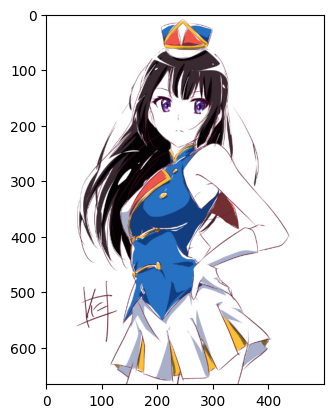

In [2]:
image = cv2.imread("../images/59021351_p0.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [22]:
image.shape

(666, 500, 3)

## remap

- map1: 目标图像中的每一个像素都对应于(映射于)原始图像的中的某个像素，将对应的原始图像的像素坐标的col存放在map1中。map1的shape和目标图像一样。
- map2: 目标图像中的每一个像素都对应于(映射于)原始图像的中的某个像素，将对应的原始图像的像素坐标的row存放在map2中。map2的shape和目标图像一样。

In [48]:
# col
map1 = np.arange(image.shape[1])
print(map1.shape)
map1 = np.expand_dims(map1, axis=0) + np.zeros(image.shape[:-1])
map1 = map1.astype(np.float32)
print(map1.shape)
map1

(500,)
(666, 500)


array([[  0.,   1.,   2., ..., 497., 498., 499.],
       [  0.,   1.,   2., ..., 497., 498., 499.],
       [  0.,   1.,   2., ..., 497., 498., 499.],
       ...,
       [  0.,   1.,   2., ..., 497., 498., 499.],
       [  0.,   1.,   2., ..., 497., 498., 499.],
       [  0.,   1.,   2., ..., 497., 498., 499.]], dtype=float32)

In [52]:
# 左右翻转
map1_r = map1[:, ::-1]
map1_r

array([[499., 498., 497., ...,   2.,   1.,   0.],
       [499., 498., 497., ...,   2.,   1.,   0.],
       [499., 498., 497., ...,   2.,   1.,   0.],
       ...,
       [499., 498., 497., ...,   2.,   1.,   0.],
       [499., 498., 497., ...,   2.,   1.,   0.],
       [499., 498., 497., ...,   2.,   1.,   0.]], dtype=float32)

In [49]:
# col
map2 = np.arange(image.shape[0])
print(map2.shape)
map2 = np.expand_dims(map2, axis=1) + np.zeros(image.shape[:-1])
map2 = map2.astype(np.float32)
print(map2.shape)
map2

(666,)
(666, 500)


array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  1.,   1.,   1., ...,   1.,   1.,   1.],
       [  2.,   2.,   2., ...,   2.,   2.,   2.],
       ...,
       [663., 663., 663., ..., 663., 663., 663.],
       [664., 664., 664., ..., 664., 664., 664.],
       [665., 665., 665., ..., 665., 665., 665.]], dtype=float32)

In [53]:
map2_r = map2[::-1]
map2_r

array([[665., 665., 665., ..., 665., 665., 665.],
       [664., 664., 664., ..., 664., 664., 664.],
       [663., 663., 663., ..., 663., 663., 663.],
       ...,
       [  2.,   2.,   2., ...,   2.,   2.,   2.],
       [  1.,   1.,   1., ...,   1.,   1.,   1.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.]], dtype=float32)

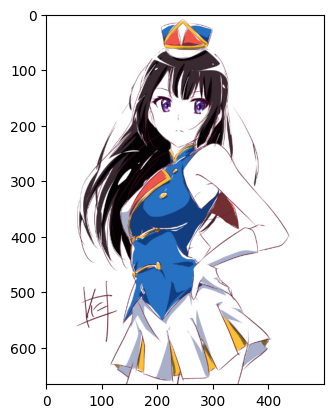

In [54]:
r = cv2.remap(
    src=image,
    map1=map1,
    map2=map2,
    interpolation=cv2.INTER_LINEAR,
    borderMode=cv2.BORDER_CONSTANT,
    borderValue=(0, 0, 0),
)
plt.imshow(r)

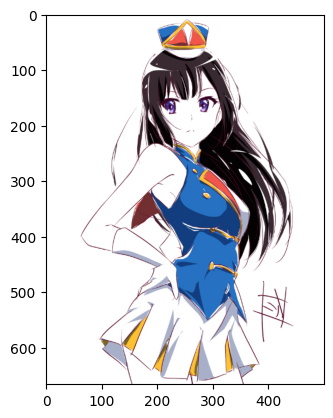

In [55]:
r = cv2.remap(
    src=image,
    map1=map1_r,
    map2=map2,
    interpolation=cv2.INTER_LINEAR,
    borderMode=cv2.BORDER_CONSTANT,
    borderValue=(0, 0, 0),
)
plt.imshow(r)

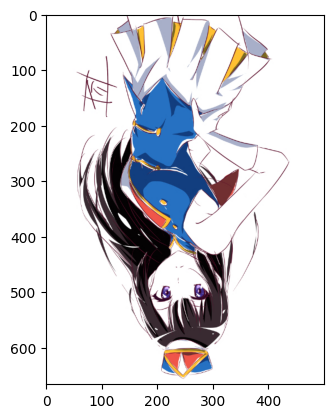

In [56]:
r = cv2.remap(
    src=image,
    map1=map1,
    map2=map2_r,
    interpolation=cv2.INTER_LINEAR,
    borderMode=cv2.BORDER_CONSTANT,
    borderValue=(0, 0, 0),
)
plt.imshow(r)

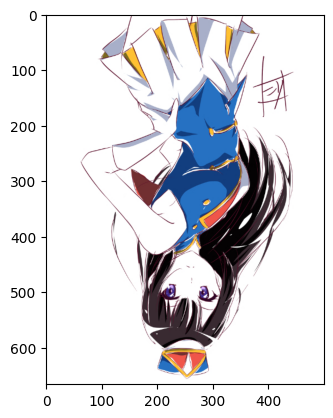

In [57]:
r = cv2.remap(
    src=image,
    map1=map1_r,
    map2=map2_r,
    interpolation=cv2.INTER_LINEAR,
    borderMode=cv2.BORDER_CONSTANT,
    borderValue=(0, 0, 0),
)
plt.imshow(r)